In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
import seaborn as sns

In [12]:
#Análise Expoloratória dos Dados
data = pd.read_csv(r"C:\users\mates\downloads\heart_statlog_cleveland_hungary_final.csv")

print(data.head())

print(data.info())

print(data.describe())

print(data['target'].value_counts())

plt.figure(figsize=(6, 4))
plt.hist(data['target'])
plt.xlabel('Target')
plt.ylabel('Frequência')
plt.title('Distribuição da Variável Target')
plt.show()

KeyboardInterrupt: 

In [ ]:
#Preparação dos Dados
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Treinamento do Modelo Inicial

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
#Avaliação do Modelo

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))

In [ ]:
#Ajustes no Pipeline de Treinamento

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

In [ ]:
#Reaviliação do Desempenho do Modelo

y_pred_updated = model.predict(X_test)

accuracy_updated = accuracy_score(y_test, y_pred_updated)
print("Acurácia do modelo atualizado:", accuracy_updated)

print("Relatório de classificação atualizado:")
print(classification_report(y_test, y_pred_updated))

print("Matriz de confusão atualizada:\n", confusion_matrix(y_test, y_pred_updated))

In [17]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

c:\Users\mates\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


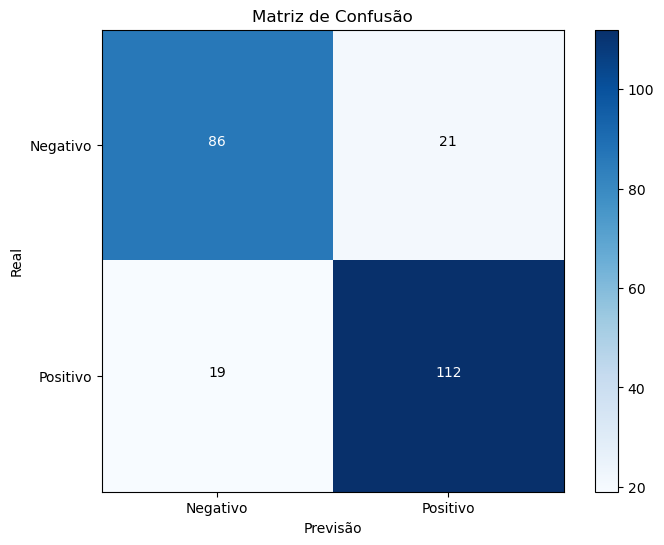

In [19]:
#Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Previsão')
plt.ylabel('Real')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()


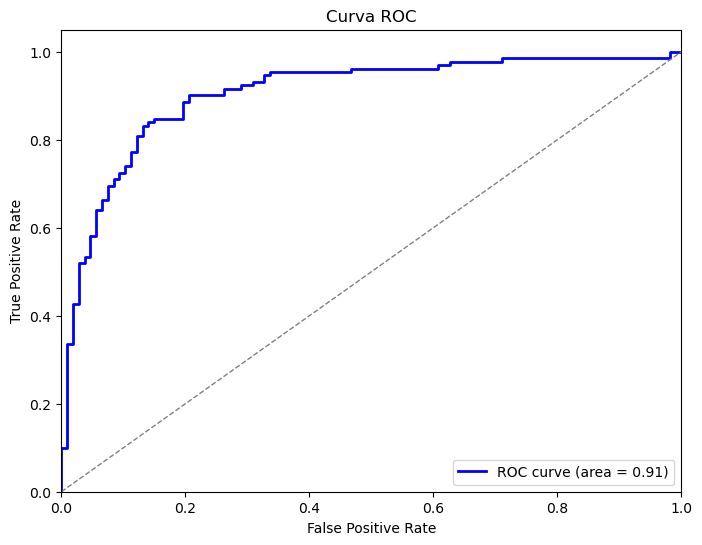

In [20]:
#Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

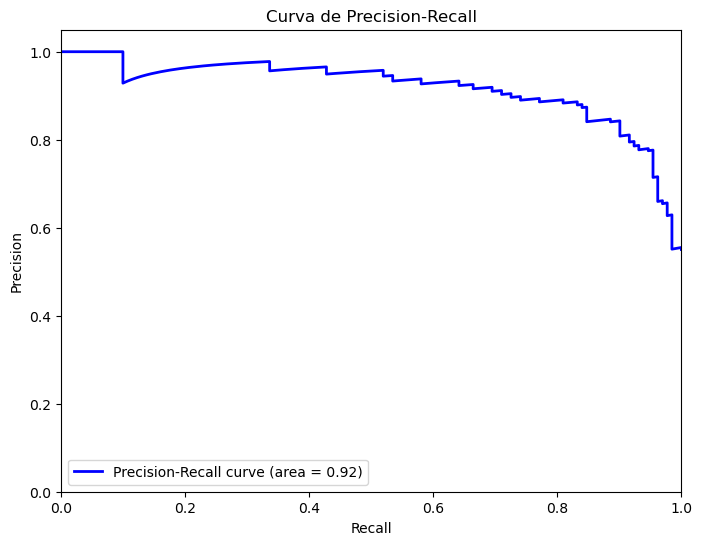

In [21]:
#Plotar a curva de precisão-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precision-Recall')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()